In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataset_dir = r'C:\Users\DELL\Desktop\projects\wall crack detection\archive'  

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training' 
)

validation_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation' 
)

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model.summary()

c:\Users\DELL\Desktop\projects\wall crack detection\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',     
    metrics=['accuracy']            
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.9194 - loss: 0.2184

c:\Users\DELL\Desktop\projects\wall crack detection\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 636s 634ms/step - accuracy: 0.9195 - loss: 0.2183 - val_accuracy: 0.9836 - val_loss: 0.0470
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 294s 294ms/step - accuracy: 0.9804 - loss: 0.0612 - val_accuracy: 0.9796 - val_loss: 0.0476
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 289s 289ms/step - accuracy: 0.9818 - loss: 0.0576 - val_accuracy: 0.9925 - val_loss: 0.0346
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 291s 291ms/step - accuracy: 0.9781 - loss: 0.0771 - val_accuracy: 0.9952 - val_loss: 0.0192
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 288s 288ms/step - accuracy: 0.9871 - loss: 0.0415 - val_accuracy: 0.9937 - val_loss: 0.0211
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 299s 299ms/step - accuracy: 0.9891 - loss: 0.0350 - val_accuracy: 0.9948 - val_loss: 0.0208
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 314s 314ms/step - accuracy: 0.9867 - loss: 0.0428 - val_accuracy: 0.9950 - val_loss: 0.0204
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 306s 306ms/step - accuracy: 0.9

In [8]:
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.9953 - loss: 0.0263
Validation Accuracy: 99.55%


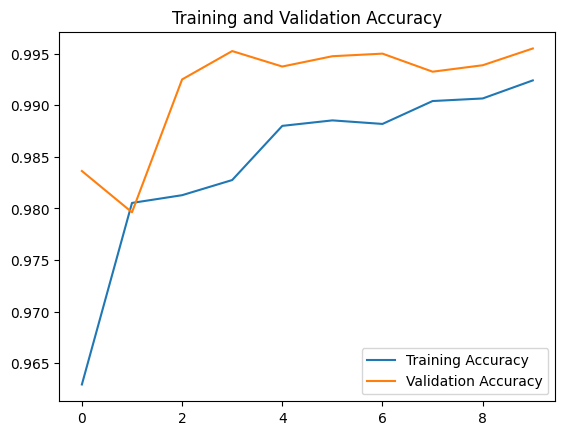

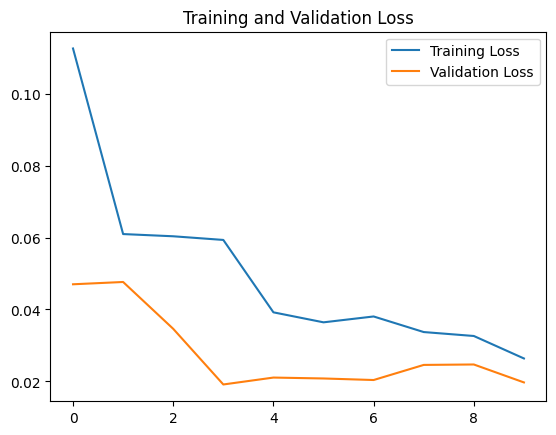

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()